In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 


file_path_train = os.getcwd()+'/train.csv'
file_path_test = os.getcwd()+'/test.csv'

train_raw = pd.read_csv(file_path_train)
test_raw = pd.read_csv(file_path_test)

In [2]:
len(train_raw)

6895

In [3]:
len(test_raw)

767

In [4]:
df_raw = pd.concat([train_raw, test_raw], ignore_index=True)

In [5]:
df_raw.columns

Index(['id', 'short_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'birthday_date', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_name', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'pow

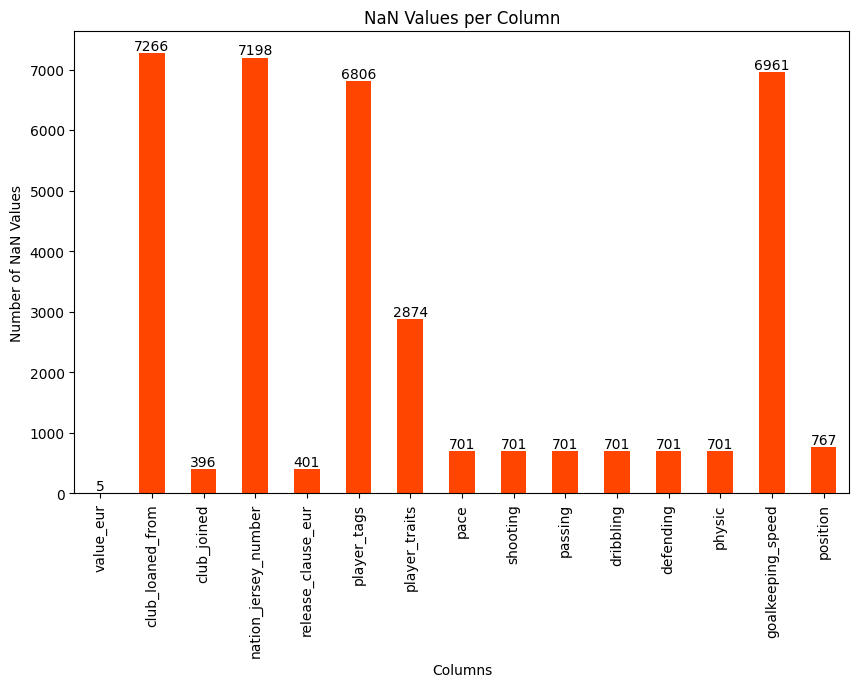

In [6]:
# Check for NaN values and filter columns with more than 0 NaN
na_counts = df_raw.isna().sum()
columns_with_nan = na_counts[na_counts > 0].index

# Plot the number of NaN values per column
ax = na_counts[columns_with_nan].plot(kind='bar', figsize=(10, 6), color='orangered')
plt.title('NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

# Add numbers on top of each bar
for i, v in enumerate(na_counts[columns_with_nan]):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [7]:
df_raw['position'].value_counts()

position
RCB    631
GK     631
LCB    631
RB     463
LB     463
ST     428
RCM    423
LCM    423
RM     369
LM     369
CAM    263
RDM    201
LS     201
RS     201
LDM    201
CB     167
RW     166
LW     166
CDM    151
LWB    104
RWB    104
CM      75
LF      32
RF      32
Name: count, dtype: int64

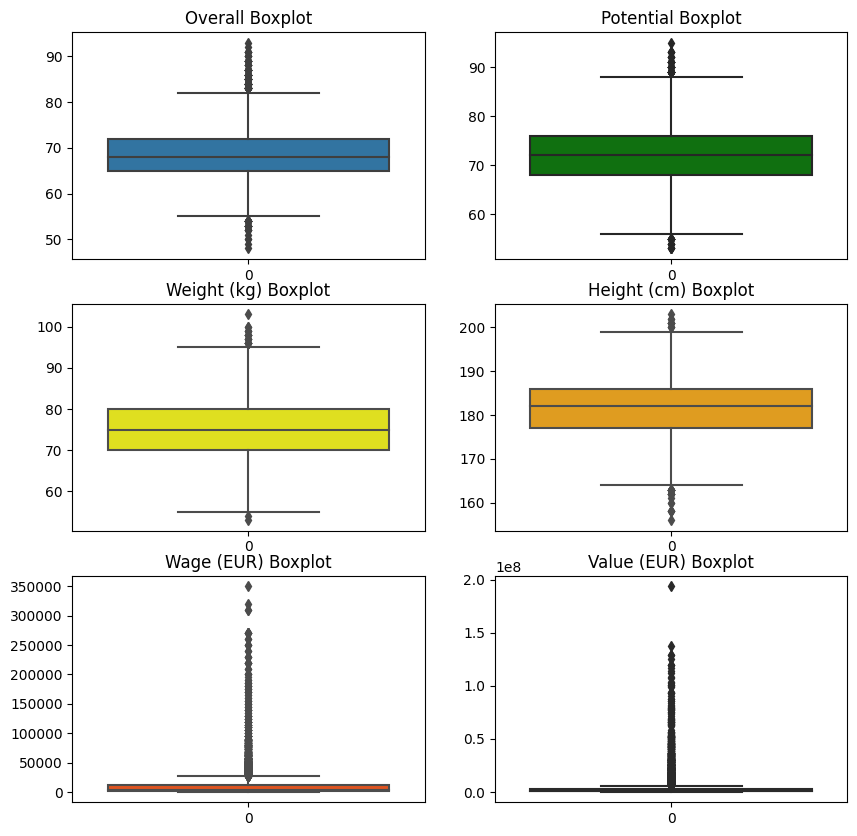

In [8]:
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.boxplot(df_raw['overall'], ax = axes[0,0])
axes[0,0].set_title('Overall Boxplot')

sns.boxplot(df_raw['potential'], ax = axes[0,1], color='green')
axes[0,1].set_title('Potential Boxplot')

sns.boxplot(df_raw['weight_kg'], ax = axes[1,0], color = 'yellow')
axes[1,0].set_title('Weight (kg) Boxplot')

sns.boxplot(df_raw['height_cm'], ax = axes[1,1], color='orange')
axes[1,1].set_title('Height (cm) Boxplot')

sns.boxplot(df_raw['wage_eur'], ax = axes[2,0], color='orangered')
axes[2,0].set_title('Wage (EUR) Boxplot')

sns.boxplot(df_raw['value_eur'], ax = axes[2,1], color='darkred')
axes[2,1].set_title('Value (EUR) Boxplot')


plt.show()

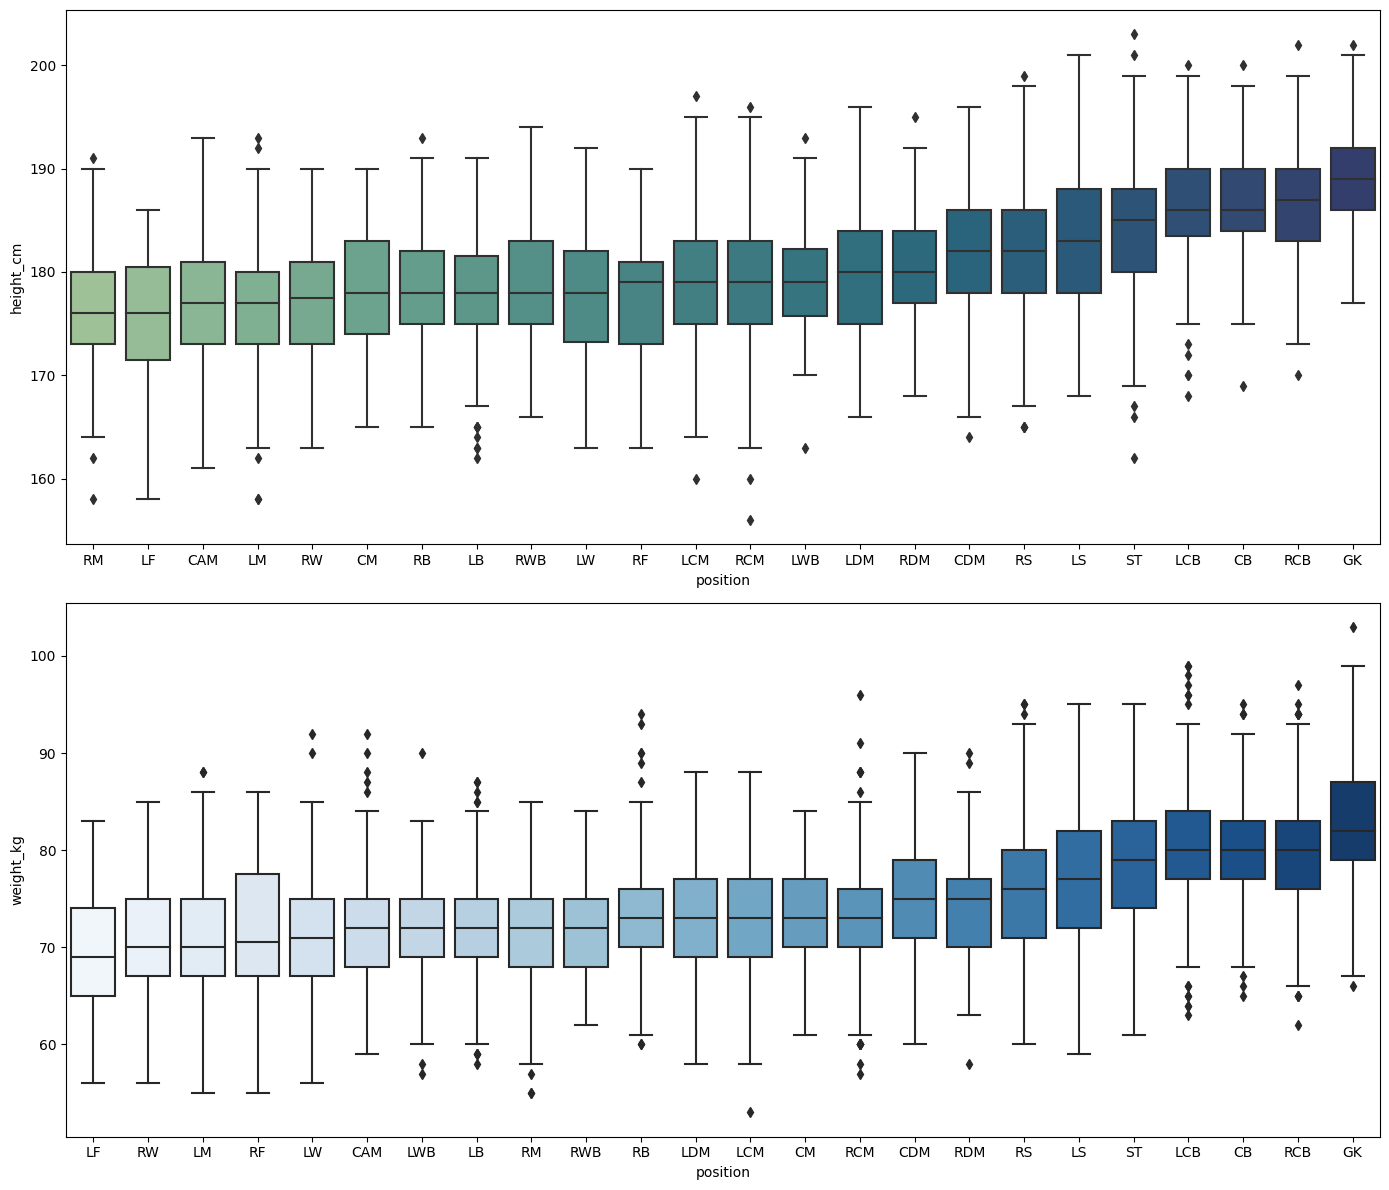

In [9]:
# Calculate the median height for each position
median_heights = df_raw.groupby('position')['height_cm'].median().sort_values(ascending=True)

# Calculate the median weight for each position
median_weights = df_raw.groupby('position')['weight_kg'].median().sort_values(ascending=True)

# Suppress the deprecation warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a subplot with two axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot the boxplot for height on the first axis
sns.boxplot(ax=axes[0], x='position', y='height_cm', data=df_raw, palette='crest', order=median_heights.index)

# Plot the boxplot for weight on the second axis
sns.boxplot(ax=axes[1], x='position', y='weight_kg', data=df_raw, palette='Blues', order=median_weights.index)

# Adjust layout
plt.tight_layout()

plt.show()

In [10]:
df_raw.loc[df_raw['goalkeeping_speed'] > 0, 'position'].value_counts() # Imputation: 0, field players have no goalkeeping speed.

position
GK    631
Name: count, dtype: int64

In [11]:
from sklearn.impute import KNNImputer


columns_to_impute = ['value_eur','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

knn_imputer = KNNImputer(n_neighbors=50)  

imputed_data = knn_imputer.fit_transform(df_raw[columns_to_impute])

df_raw[columns_to_impute] = imputed_data

In [12]:
df_raw['goalkeeping_speed'] = df_raw['goalkeeping_speed'].fillna(10)

In [13]:
features = ['overall', 'potential', 'value_eur', 'wage_eur','height_cm', 'weight_kg', 'club_jersey_number', 'preferred_foot',
            'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
            'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
            'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
            'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
            'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
            'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed','position']

In [14]:
df = df_raw[features]

In [15]:
def one_hot_encoding(data, column):
    data = data.copy() # create deep copy of data

    dummy = pd.get_dummies(data[column]).astype(int) # get dummies
    data = pd.concat([data, dummy], axis=1) # add dummy columns to dataframe 
    data = data.drop(columns = column)

    return data


In [16]:
df['weak_foot']

0       5
1       3
2       3
3       3
4       2
       ..
7657    3
7658    2
7659    4
7660    3
7661    3
Name: weak_foot, Length: 7662, dtype: int64

In [17]:
df = one_hot_encoding(df, 'weak_foot')
df = df.rename(columns={1:'wf_one_star', 2:'wf_two_stars', 3:'wf_three_stars', 4:'wf_four_stars', 5:'wf_five_stars'})

df = one_hot_encoding(df, 'skill_moves')
df = df.rename(columns={1:'sm_one_star', 2:'sm_two_stars', 3:'sm_three_stars', 4:'sm_four_stars', 5:'sm_five_stars'})


In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
encoder = LabelEncoder()
df['preferred_foot'] = encoder.fit_transform(df['preferred_foot'])
df['position'] = encoder.fit_transform(df['position'])


In [19]:
tr = df[:6895]
te = df[6895:]

In [20]:
df

,overall,potential,value_eur,wage_eur,height_cm,weight_kg,club_jersey_number,preferred_foot,pace,shooting,...,wf_one_star,wf_two_stars,wf_three_stars,wf_four_stars,wf_five_stars,sm_one_star,sm_two_stars,sm_three_stars,sm_four_stars,sm_five_stars
0,71,71,1400000.0,10000,176,73,29,1,70.0,52.0,...,0,0,0,0,1,0,0,1,0,0
1,65,71,1000000.0,2000,183,73,4,1,65.0,38.0,...,0,0,1,0,0,0,1,0,0,0
2,65,77,1600000.0,2000,178,69,19,0,79.0,35.0,...,0,0,1,0,0,0,0,1,0,0
3,72,72,2300000.0,5000,188,81,9,1,64.0,74.0,...,0,0,1,0,0,0,0,1,0,0
4,65,65,525000.0,3000,179,74,30,0,74.0,53.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,72,72,2300000.0,17000,165,65,3,0,82.0,66.0,...,0,0,1,0,0,0,0,1,0,0
7658,68,74,1700000.0,2000,180,70,2,1,68.0,44.0,...,0,1,0,0,0,0,1,0,0,0
7659,65,65,700000.0,6000,185,80,9,1,65.0,64.0,...,0,0,0,1,0,0,0,1,0,0
7660,81,81,12500000.0,18000,183,76,30,1,63.0,57.0,...,0,0,1,0,0,0,1,0,0,0


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



class Model():
    
    def __init__(self, feature, target, train, test, params = None ): 
        """
        Initialize Model class

        Args:
        feature (list) : List of names of feature columns (str)
        target (str): Name of the target variable
        train (pd.DataFrame): Train dataframe
        test (pd.DataFrame): Test dataframe
        params (dict): Dictionary of specified parameters, default: n_estimators=100, max_depth=None, random_state=None
        """
        self.__feature = feature # 1. Feature columns that are going to be used
        self.__target = target # 2. Target column that is going to be used
        self.__train = train.copy()
        self.__test = test.copy()
        self.model = RandomForestClassifier(**(params or {}))
        self.params = params

    def model_predictions(self):
        """
        RandomForestClassifier predictions for train and test

        Returns:
        Train and test pd.DataFrame with prediction column
        """
        self.model.fit(self.__train[self.__feature], self.__train[self.__target])

        predictions_train = self.model.predict_proba(self.__train[self.__feature])
        predictions_train = pd.DataFrame(predictions_train, index = self.__train.index, columns=[f'pred_{i}' for i in range(24)])
        train = pd.concat([self.__train, predictions_train], axis = 1)

        predictions_test = self.model.predict_proba(self.__test[self.__feature])
        predictions_test = pd.DataFrame(predictions_test, index = self.__test.index, columns=[f'pred_{i}' for i in range(24)])
        test = pd.concat([self.__test, predictions_test], axis = 1)

        return train, test


    def randomized_param_tuning(self):
        """
        Randomaized Parameter Tuning for Random Forest Classifier
        
        Parameter grid:
        n_estimators: Number of trees in random forest
        max_features: Number of features to consider at every split
        max_depth: Maximum number of levels in tree
        min_samples_split: Minimum number of samples required to split a node
        min_samples_leaf: Minimum number of samples required at each leaf node
        bootstrap: method of secelcting samples for training each tree

        Returns: Best parameters (dict)
        """
        model = RandomForestClassifier()
        n_estimators = [5,20,50,100] # Number of trees in random forest
        max_features = ['log2', 'sqrt'] # Number of features to consider at every split
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]  # Maximum number of levels in tree
        max_depth.append(None)
        min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
        min_samples_leaf = [1, 2, 4]  # Minimum number of samples required at each leaf node
        bootstrap = [True, False] # Method of selecting samples for training each tree
        random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
        rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
        # Fit the random search model
        rf_random.fit(self.__train[self.__feature], self.__train[self.__target])
        return rf_random.best_params_

In [22]:
rf_model = Model(target='position', feature=df.columns, test=te, train=tr)

In [23]:
best_params = rf_model.randomized_param_tuning()

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total tim

In [24]:
features = ['overall', 'potential', 'value_eur', 'wage_eur','height_cm', 'weight_kg', 'club_jersey_number', 'preferred_foot',
            'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
            'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
            'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
            'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
            'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
            'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed','position', 'wf_one_star', 'wf_two_stars', 
            'wf_three_stars', 'wf_four_stars', 'wf_five_stars', 'sm_one_star', 'sm_two_stars', 'sm_three_stars', 'sm_four_stars', 'sm_five_stars']

In [25]:
X_train = tr[features].drop('position', axis=1)
y_train = tr['position']

X_test = te[features].drop('position', axis=1)

In [26]:
rf = RandomForestClassifier(**best_params)

best_model = rf.fit(X_train, y_train)

In [27]:
y_pred = best_model.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='micro')

In [29]:
print('Accuracy: ', accuracy)
print('F1-score: ', f1)

Accuracy:  0.9998549673676578
F1-score:  0.9998549673676578


In [30]:
test_preds = best_model.predict(X_test)
test_preds
decoded_test_preds = encoder.inverse_transform(test_preds)

In [31]:
decoded_test_preds

array(['RB', 'LCB', 'ST', 'RM', 'RB', 'GK', 'RB', 'LCM', 'RDM', 'LCB',
       'ST', 'CAM', 'GK', 'LB', 'RCB', 'LCB', 'RCM', 'LB', 'ST', 'RB',
       'RCM', 'RM', 'ST', 'LCM', 'RB', 'LCB', 'LB', 'RDM', 'GK', 'RB',
       'LB', 'GK', 'LM', 'GK', 'RCB', 'RM', 'GK', 'LCB', 'LCM', 'GK',
       'RCB', 'RDM', 'LB', 'RCB', 'GK', 'LCM', 'ST', 'RCB', 'RB', 'LB',
       'RCB', 'GK', 'RCM', 'LB', 'ST', 'LM', 'ST', 'RB', 'RB', 'GK', 'LB',
       'ST', 'LB', 'ST', 'ST', 'GK', 'RCB', 'CAM', 'CAM', 'RCM', 'GK',
       'RB', 'RCB', 'LCB', 'ST', 'RCM', 'LCM', 'LCB', 'RCM', 'RB', 'LCM',
       'LDM', 'RM', 'GK', 'RCB', 'GK', 'GK', 'LM', 'ST', 'RCM', 'RB',
       'RCM', 'RCB', 'RS', 'LCB', 'LB', 'RDM', 'RCM', 'ST', 'LM', 'RB',
       'RM', 'RCM', 'LM', 'GK', 'RCB', 'GK', 'ST', 'ST', 'LCB', 'LM',
       'ST', 'LCB', 'LB', 'LCM', 'LCM', 'RCB', 'GK', 'RM', 'ST', 'LCB',
       'RM', 'RWB', 'ST', 'GK', 'LCM', 'RCB', 'RCB', 'LM', 'ST', 'RB',
       'LCB', 'GK', 'LB', 'RCM', 'ST', 'GK', 'RB', 'LCB', 'RCM', 'GK',

In [32]:
#Produce .csv for kaggle testing 

test_predictions_submit = pd.DataFrame({"id": test_raw["id"], "price": decoded_test_preds})
test_predictions_submit.to_csv("test_predictions_submit.csv", index = False)